# 2. Projekat iz predmeta Mašinsko učenje

Credit Card Customer Segmentation Data:
https://www.kaggle.com/datasets/busraatasoy/credit-card-customer-segmentation-data

Marija Cvetković 1940

Luka Kocić 2022

In [1]:
import pandas as pd

df = pd.read_csv("customer-segmentation.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [3]:
df.drop(columns=["customer_id"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10127 non-null  int64  
 1   gender                    10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   education_level           10127 non-null  object 
 4   marital_status            10127 non-null  object 
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.0+ MB


In [4]:
df.describe()

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [5]:
df.isnull().sum()

age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [6]:
df.duplicated().any()

np.False_

In [7]:
df.nunique()

age                           45
gender                         2
dependent_count                6
education_level                6
marital_status                 4
estimated_income             181
months_on_book                44
total_relationship_count       6
months_inactive_12_mon         7
credit_limit                6205
total_trans_amount          5033
total_trans_count            126
avg_utilization_ratio        964
dtype: int64

In [8]:
# Pregled jedinstvenih vrednosti
print("Broj jedinstvenih vrednosti po koloni:")
print(df.nunique())

print("\n--- Kategoričke kolone ---")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col}: {df[col].unique()}")

Broj jedinstvenih vrednosti po koloni:
age                           45
gender                         2
dependent_count                6
education_level                6
marital_status                 4
estimated_income             181
months_on_book                44
total_relationship_count       6
months_inactive_12_mon         7
credit_limit                6205
total_trans_amount          5033
total_trans_count            126
avg_utilization_ratio        964
dtype: int64

--- Kategoričke kolone ---

gender: ['M' 'F']

education_level: ['High School' 'Graduate' 'Uneducated' 'Post-Graduate' 'College'
 'Doctorate']

marital_status: ['Married' 'Single' 'Unknown' 'Divorced']


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

X = df.copy()

gender_col = ['gender']
education_col = ['education_level']
marital_col = ['marital_status']

num_c=num_cols = X.drop(columns=gender_col + education_col + marital_col).columns

num_cols = X.drop(columns=gender_col + education_col + marital_col).columns.tolist()
X_num = X[num_cols].to_numpy(dtype=float)

gender_encoder = OrdinalEncoder(categories=[["M", "F"]])
education_encoder = OrdinalEncoder(categories=[[
    "Uneducated",
    "High School",
    "College",
    "Graduate",
    "Post-Graduate",
    "Doctorate"
]])
marital_encoder = OneHotEncoder(sparse_output=False)

X_gender = gender_encoder.fit_transform(X[gender_col])
X_education = education_encoder.fit_transform(X[education_col])
X_marital = marital_encoder.fit_transform(X[marital_col])

gender_feature_names = ["gender"]
education_feature_names = ["education_level"]
marital_feature_names = marital_encoder.get_feature_names_out(marital_col).tolist()

all_columns = (
    num_cols
    + gender_feature_names
    + education_feature_names
    + marital_feature_names
)

X_encoded = np.hstack([X_num, X_gender, X_education, X_marital])

df = pd.DataFrame(X_encoded, columns=all_columns)

encoded_cols = (
    gender_feature_names
    + education_feature_names
    + marital_feature_names
)

print(df[encoded_cols].head())


   gender  education_level  marital_status_Divorced  marital_status_Married  \
0     0.0              1.0                      0.0                     1.0   
1     1.0              3.0                      0.0                     0.0   
2     0.0              3.0                      0.0                     1.0   
3     1.0              1.0                      0.0                     0.0   
4     0.0              0.0                      0.0                     1.0   

   marital_status_Single  marital_status_Unknown  
0                    0.0                     0.0  
1                    1.0                     0.0  
2                    0.0                     0.0  
3                    0.0                     1.0  
4                    0.0                     0.0  


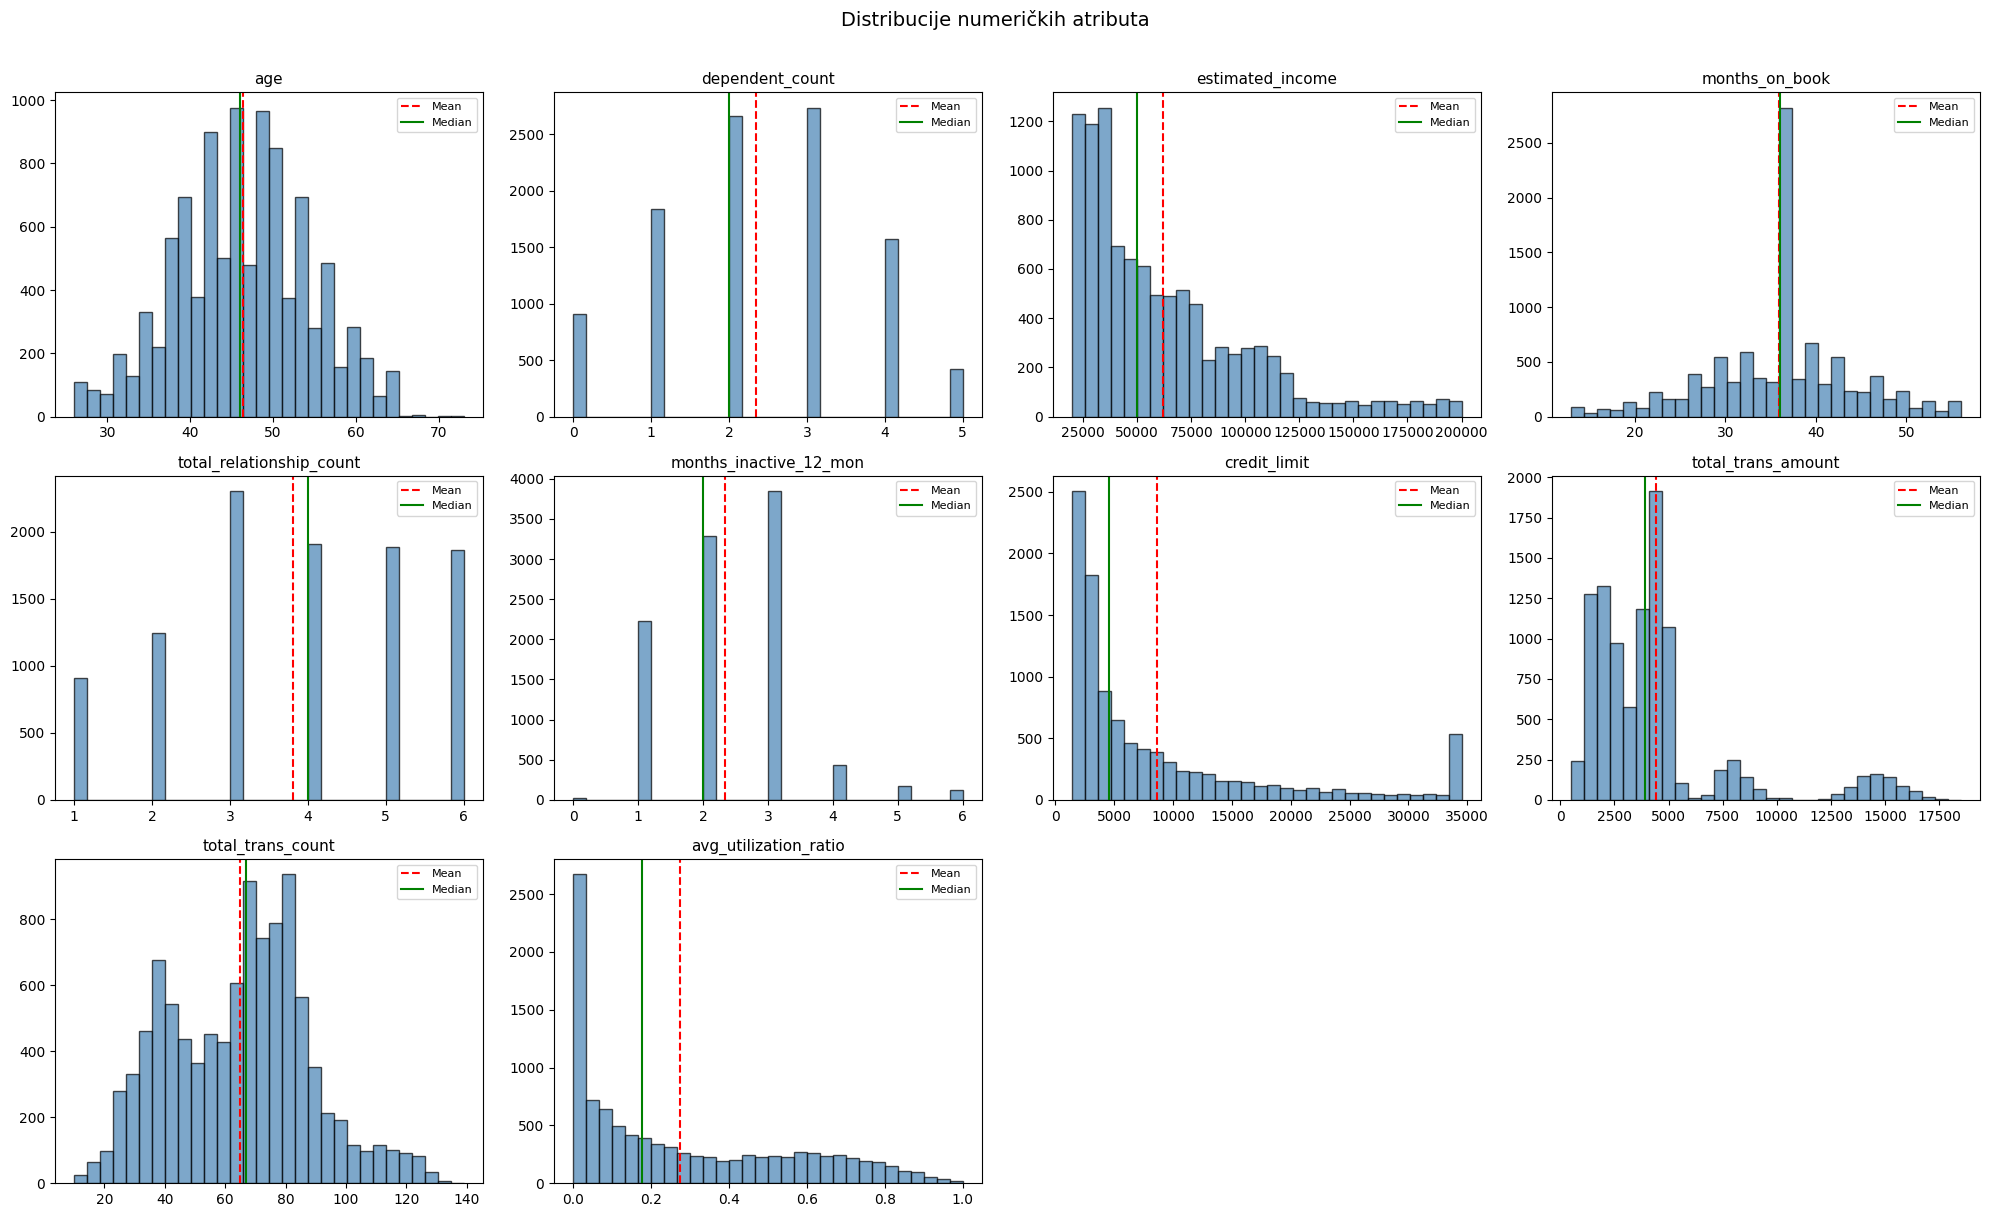

In [ ]:
import matplotlib.pyplot as plt

# Distribucije numeričkih atributa
num_cols = ['age', 'dependent_count', 'estimated_income', 'months_on_book',
            'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
            'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(col, fontsize=11)
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), color='green', linestyle='-', label='Median')
    axes[i].legend(fontsize=8)

for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribucije numeričkih atributa", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

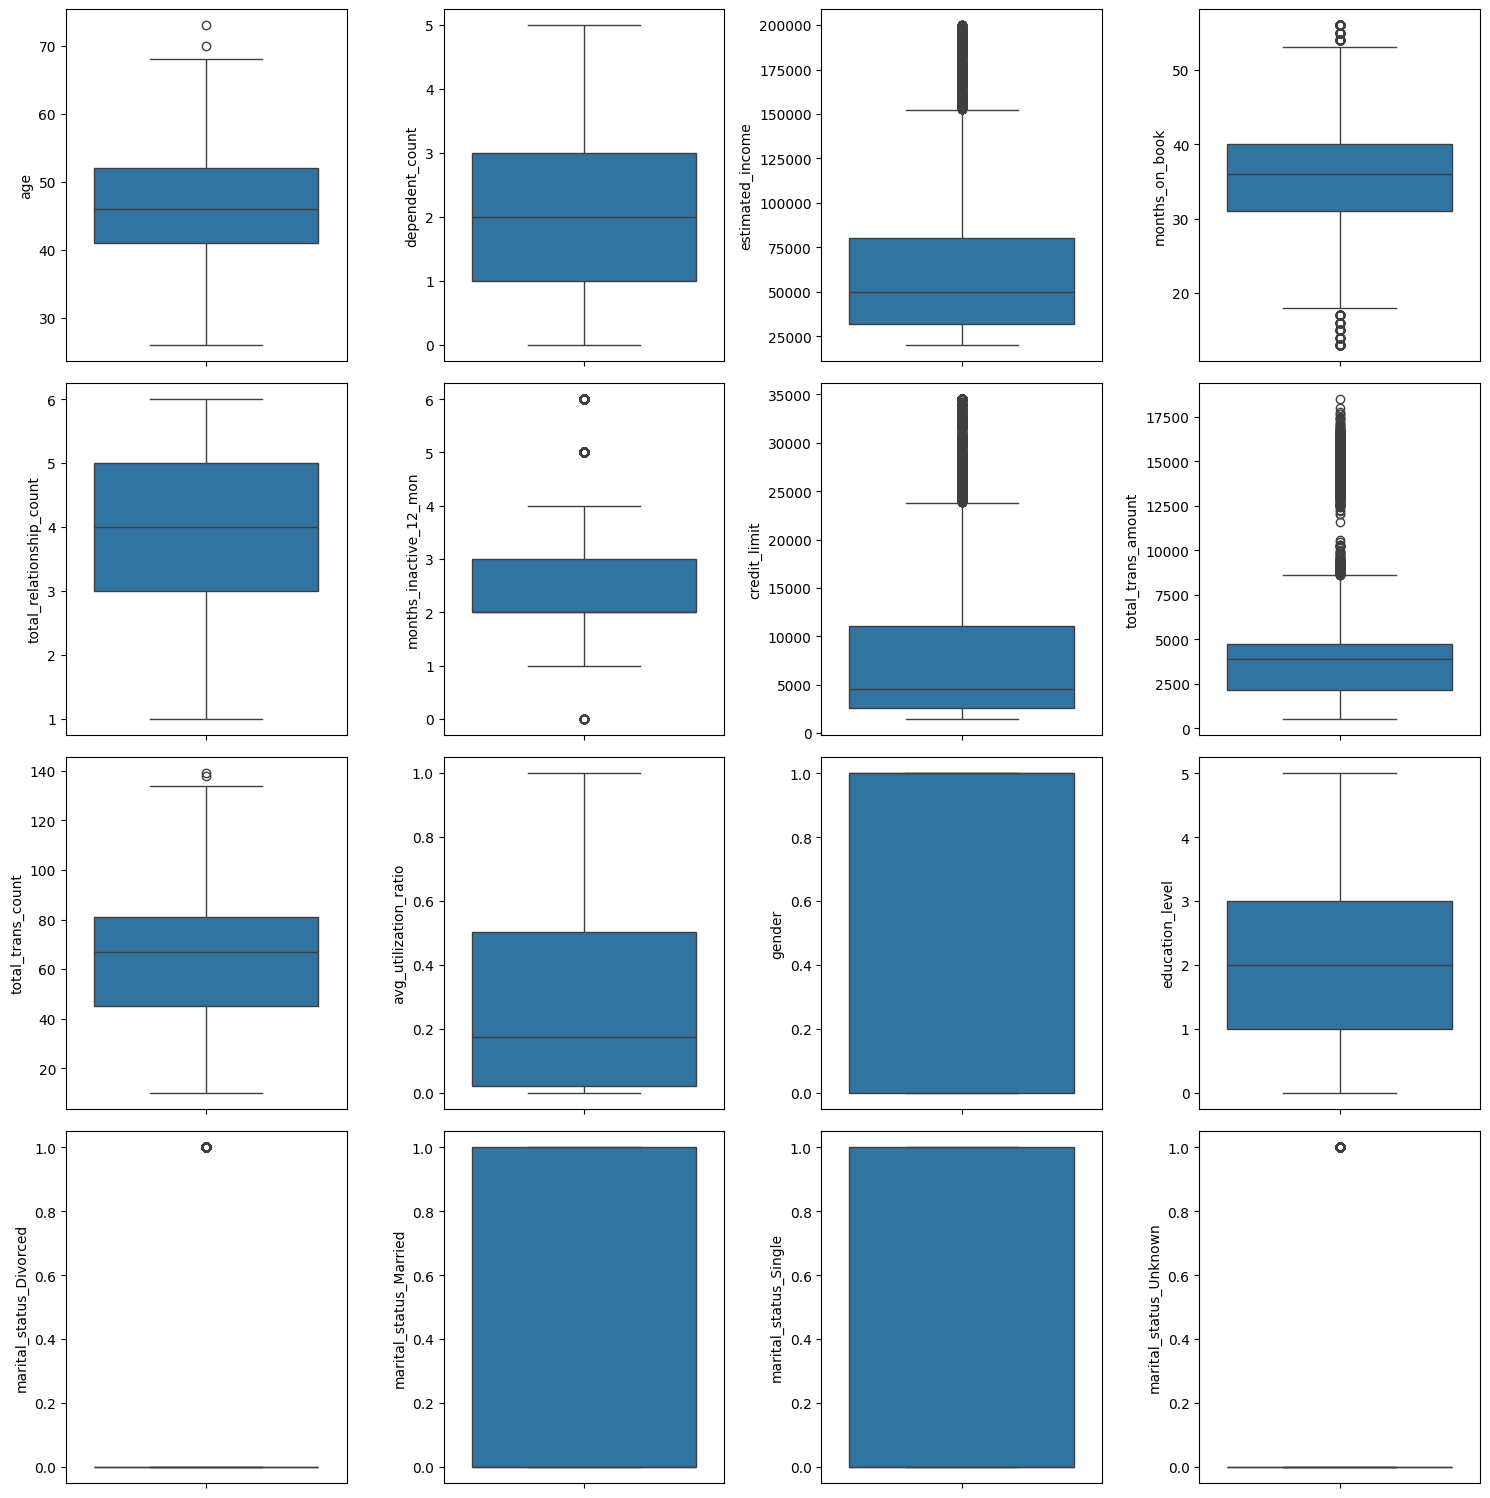

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,30))
for i in range(len(df.columns)):
    fig.add_subplot(8,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

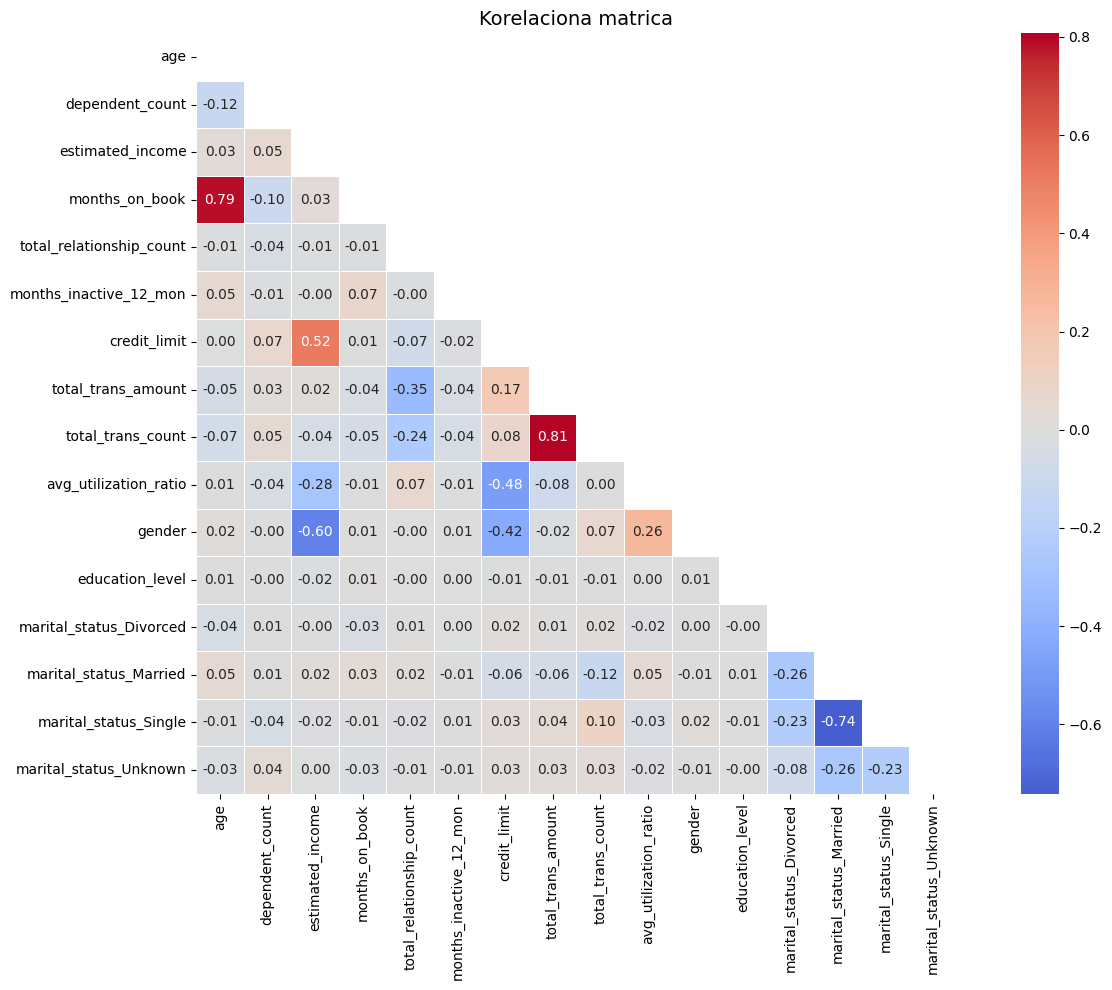

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, square=True)
plt.title("Korelaciona matrica", fontsize=14)
plt.tight_layout()
plt.show()

In [16]:

iqr_mask = pd.Series(False, index=df.index)
zscore_mask = pd.Series(False, index=df.index)

outlier_info = {}
for column in num_c:
    # IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    donja = Q1 - 1.5 * IQR
    gornja = Q3 + 1.5 * IQR

    iqr_mask |= (df[column] < donja) | (df[column] > gornja)
    n_outliers = ((df[column] < donja) | (df[column] > gornja)).sum()
    outlier_info[column] = {'count': n_outliers, 'pct': n_outliers / len(df) * 100,
                             'lower': donja, 'upper': gornja}

    # Z-score
    std = df[column].std()
    if std != 0:
        z = (df[column] - df[column].mean()) / std
        zscore_mask |= (z > 3) | (z < -3)

print(f"Broj redova sa bar jednim IQR outlierom: {iqr_mask.sum()}")
print(f"Broj redova sa bar jednim Z-score outlierom: {zscore_mask.sum()}")

print("\nOutlier-i po kolonama (IQR metoda):")
print(f"{'Kolona':<30} {'Broj':>6} {'%':>8}")
print("-" * 46)
for col, info in outlier_info.items():
    if info['count'] > 0:
        print(f"{col:<30} {info['count']:>6} {info['pct']:>7.1f}%")

# Da li je pametno ukloniti outliere? Ima ih skoro 700 na 10 000 redova?

Broj redova sa bar jednim IQR outlierom: 2530
Broj redova sa bar jednim Z-score outlierom: 699

Outlier-i po kolonama (IQR metoda):
Kolona                           Broj        %
----------------------------------------------
age                                 2     0.0%
estimated_income                  469     4.6%
months_on_book                    386     3.8%
months_inactive_12_mon            331     3.3%
credit_limit                      984     9.7%
total_trans_amount                896     8.8%
total_trans_count                   2     0.0%


## Klasterizacija

### K-Means

          variant  before_best_k  before_best_sil  before_elbow_k  \
0    MinMaxScaler              6         0.309932               5   
1    RobustScaler              2         0.299976               4   
2  StandardScaler              5         0.160016               5   

   after_best_k  after_best_sil  after_elbow_k  pca_n_components  \
0             6        0.347624              5                10   
1             2        0.322206              4                 9   
2             5        0.191195              5                11   

   pca_explained_var  
0           0.931342  
1           0.909723  
2           0.923956  


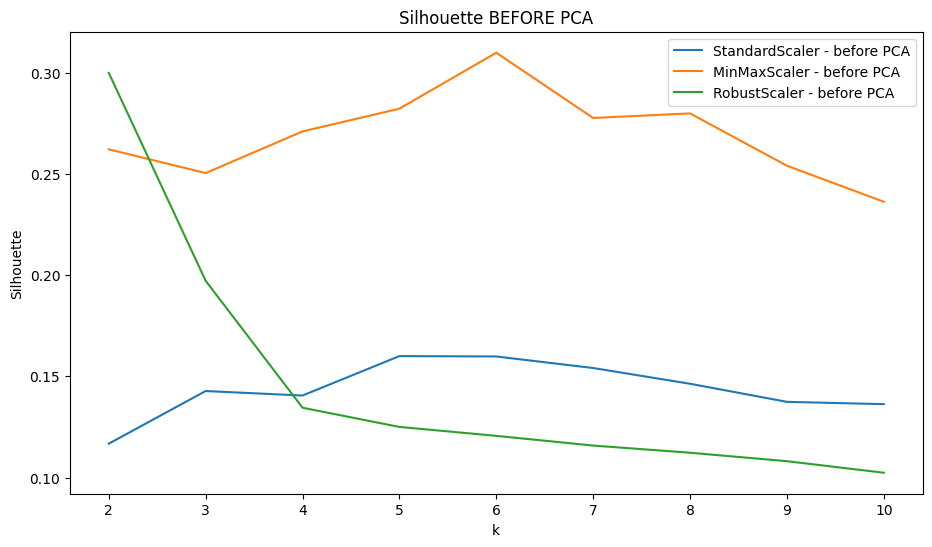

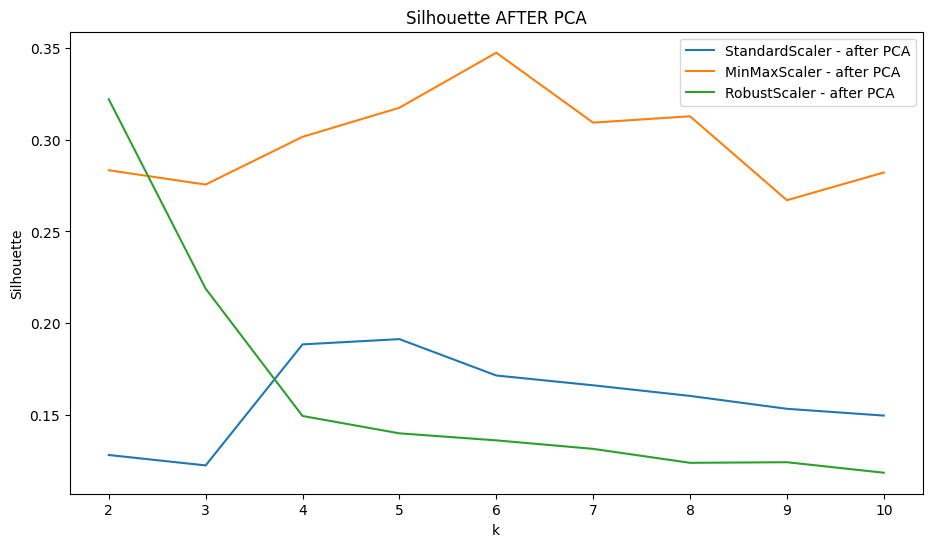

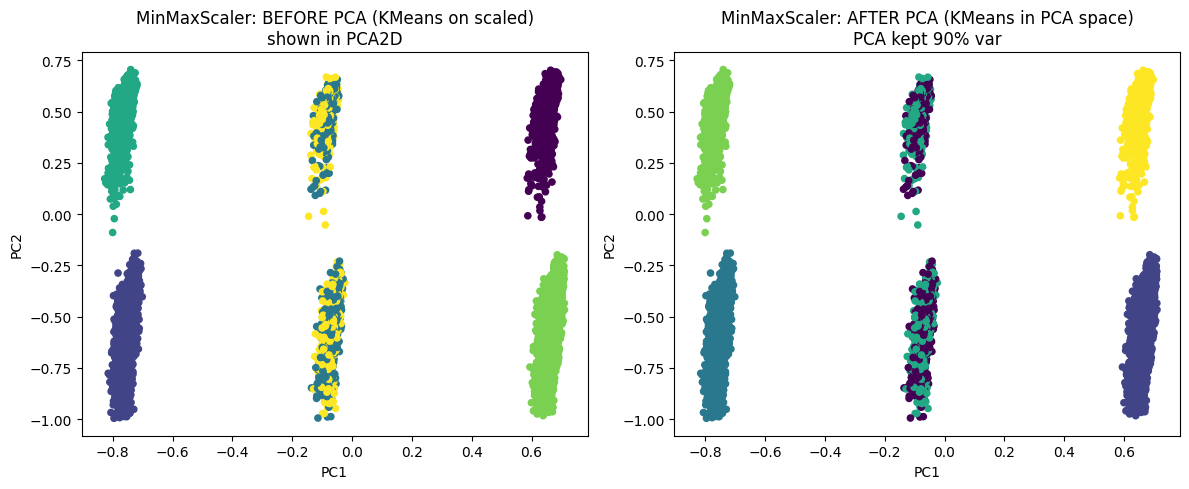

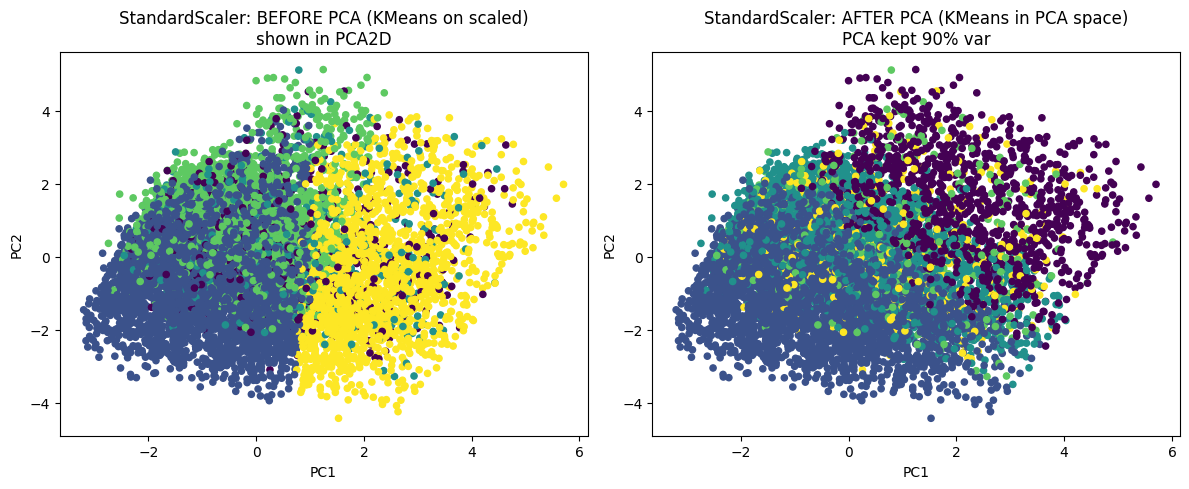

In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from kneed import KneeLocator
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

def evaluate_kmeans(X_mat, k_list):
    sse = []
    sil = []

    for k in k_list:
        km = KMeans(n_clusters=k, **kmeans_kwargs)
        labels = km.fit_predict(X_mat)
        sse.append(km.inertia_)

        if k >= 2:
            sil.append(silhouette_score(X_mat, labels))
        else:
            sil.append(None)

    kl = KneeLocator(k_list, sse, curve="convex", direction="decreasing")
    elbow_k = kl.elbow

    sil_pairs = [(k, s) for k, s in zip(k_list, sil) if s is not None]
    best_sil_k, best_sil = max(sil_pairs, key=lambda x: x[1])

    return sse, sil, elbow_k, best_sil_k, best_sil


scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
}

K = list(range(1, 11))
K2 = [k for k in K if k >= 2]

PCA_KEEP = 0.90

results = {}
rows = []

for name, scaler in scalers.items():
    X0 = df.to_numpy(dtype=float)
    X_scaled = X0 if scaler is None else scaler.fit_transform(X0)

    sse_b, sil_b, elbow_b, bestk_b, bestsil_b = evaluate_kmeans(X_scaled, K)

    pca_full = PCA(n_components=PCA_KEEP, random_state=42)
    X_pca_full = pca_full.fit_transform(X_scaled)

    sse_a, sil_a, elbow_a, bestk_a, bestsil_a = evaluate_kmeans(X_pca_full, K)

    results[name] = {
        "X_scaled": X_scaled,
        "X_pca_full": X_pca_full,
        "sse_before": sse_b,
        "sil_before": sil_b,
        "elbow_before": elbow_b,
        "bestk_before": bestk_b,
        "bestsil_before": bestsil_b,
        "sse_after": sse_a,
        "sil_after": sil_a,
        "elbow_after": elbow_a,
        "bestk_after": bestk_a,
        "bestsil_after": bestsil_a,
        "pca_components": X_pca_full.shape[1],
        "pca_explained": float(np.sum(pca_full.explained_variance_ratio_))
    }

    rows.append({
        "variant": name,
        "before_best_k": int(bestk_b),
        "before_best_sil": float(bestsil_b),
        "before_elbow_k": None if elbow_b is None else int(elbow_b),
        "after_best_k": int(bestk_a),
        "after_best_sil": float(bestsil_a),
        "after_elbow_k": None if elbow_a is None else int(elbow_a),
        "pca_n_components": int(X_pca_full.shape[1]),
        "pca_explained_var": results[name]["pca_explained"],
    })

summary = pd.DataFrame(rows).sort_values(by="after_best_sil", ascending=False).reset_index(drop=True)
print(summary)


plt.figure(figsize=(11, 6))
for name in scalers.keys():
    sil_vals = [s for k, s in zip(K, results[name]["sil_before"]) if k >= 2]
    plt.plot(K2, sil_vals, label=f"{name} - before PCA")
plt.xticks(K2)
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.title("Silhouette BEFORE PCA")
plt.legend()
plt.show()

plt.figure(figsize=(11, 6))
for name in scalers.keys():
    sil_vals = [s for k, s in zip(K, results[name]["sil_after"]) if k >= 2]
    plt.plot(K2, sil_vals, label=f"{name} - after PCA")
plt.xticks(K2)
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.title("Silhouette AFTER PCA")
plt.legend()
plt.show()



def plot_before_after(variant_name, k=None):
    X_scaled = results[variant_name]["X_scaled"]
    X_pca_full = results[variant_name]["X_pca_full"]

    if k is None:
        k = results[variant_name]["bestk_after"]

    km_before = KMeans(n_clusters=k, **kmeans_kwargs)
    labels_before = km_before.fit_predict(X_scaled)
    X_plot_before = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

    km_after = KMeans(n_clusters=k, **kmeans_kwargs)
    labels_after = km_after.fit_predict(X_pca_full)
    X_plot_after = X_pca_full[:, :2] if X_pca_full.shape[1] >= 2 else np.hstack([X_pca_full, np.zeros((X_pca_full.shape[0], 1))])

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X_plot_before[:, 0], X_plot_before[:, 1], c=labels_before, s=20, cmap="viridis")
    plt.title(f"{variant_name}: BEFORE PCA (KMeans on scaled)\nshown in PCA2D")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    plt.subplot(1, 2, 2)
    plt.scatter(X_plot_after[:, 0], X_plot_after[:, 1], c=labels_after, s=20, cmap="viridis")
    plt.title(f"{variant_name}: AFTER PCA (KMeans in PCA space)\nPCA kept {PCA_KEEP*100:.0f}% var")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    plt.tight_layout()
    plt.show()


plot_before_after("MinMaxScaler")
plot_before_after("StandardScaler")

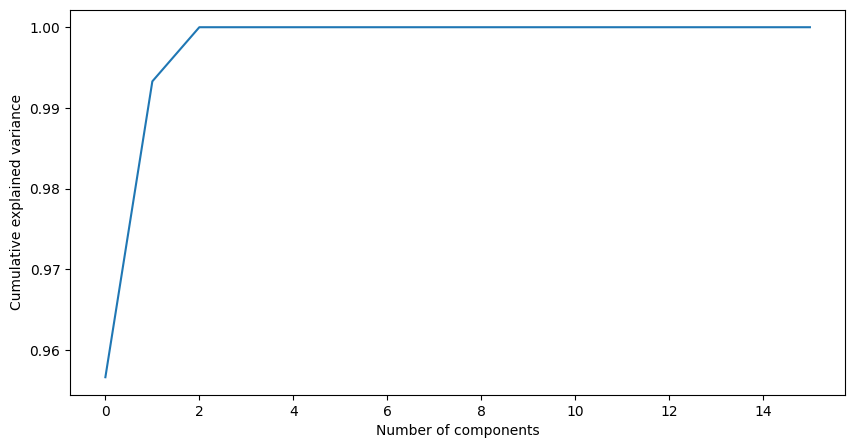

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

## Agglomerative Clustering

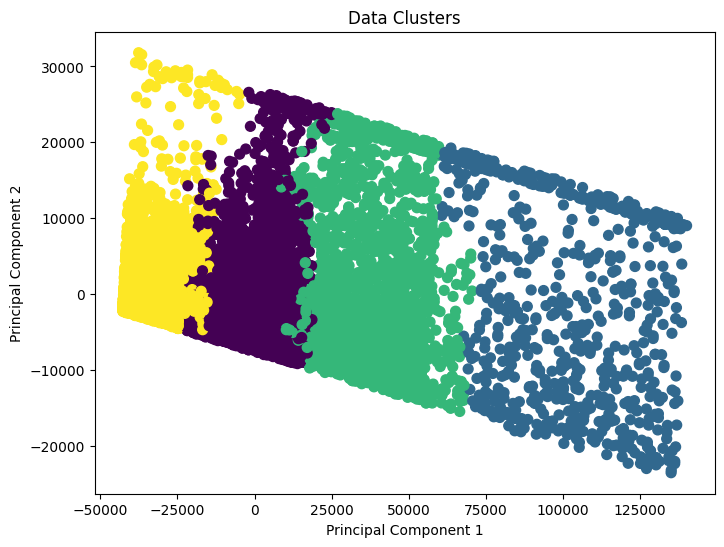

In [19]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=4)
agglomerative_clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_clusters, s=50, cmap='viridis')
plt.title('Data Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

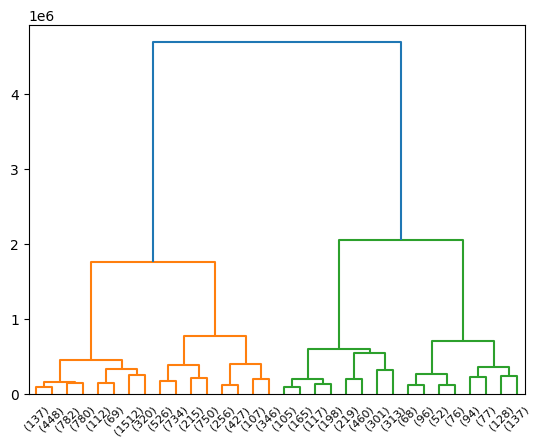

In [21]:
import scipy.cluster.hierarchy as sch

X = df.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=4)

## DBSCAN

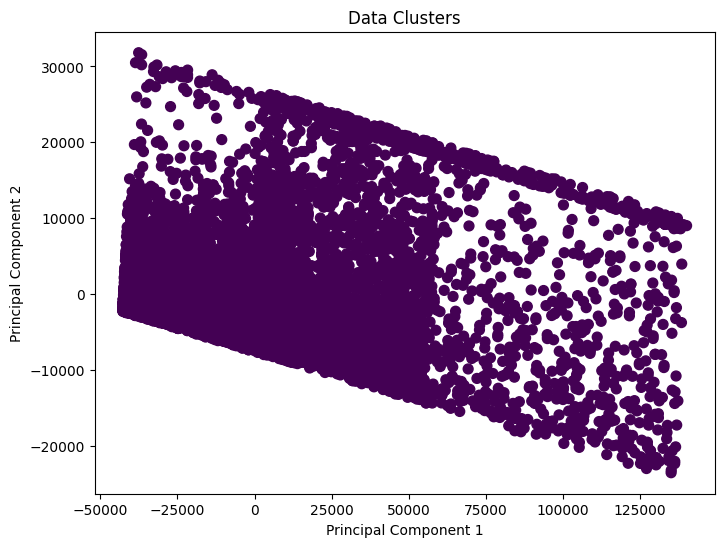

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
y_dbscan = dbscan.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('Data Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()